# S03 T02: Visualització gràfica de Múltiples variables

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ex1
##### Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

In [2]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.sample(7)

,total_bill,tip,sex,smoker,day,time,size
168,10.59,1.61,Female,Yes,Sat,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
25,17.81,2.34,Male,No,Sat,Dinner,4
100,11.35,2.50,Female,Yes,Fri,Dinner,2
156,48.17,5.00,Male,No,Sun,Dinner,6
185,20.69,5.00,Male,No,Sun,Dinner,5
20,17.92,4.08,Male,No,Sat,Dinner,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [6]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<span style=color:white>Scatter Plots</span> Per a examinar les relacions existents entre dues series 1D.

<span style=color:white><font size=3><b><u></u></b> 1 Categòrica = ('Sexe'), 2 Numèriques = ('Total bill', 'Tip')</font></span>

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

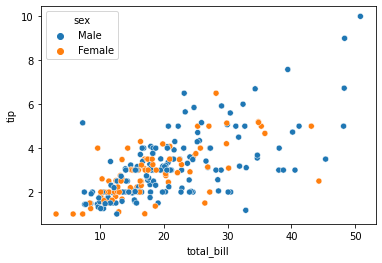

In [7]:
# despeses per sexes
sns.scatterplot(x = "total_bill", y = "tip", hue= "sex", data = df)

<span style=color:white><font size=3><b><u></u></b> 1 Categòrica = ('Client Fumador o no'), 2 Numèriques = ('Total bill', 'Tip')</font></span>

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

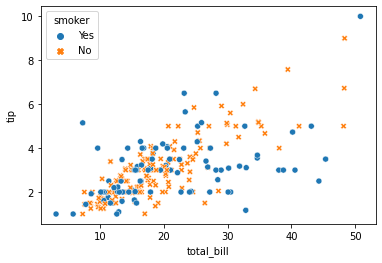

In [8]:
# despeses per fumadors o no
sns.scatterplot(x = "total_bill", y = "tip", hue= "smoker", style= "smoker", data = df)

<span style=color:white><font size=4><b><u>Dues variables amb Barplot</u></b></font></span>

In [9]:
# % propina 
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


<span style=color:white><font size=3><b> 1 Categòrica = ('day'), 1 Numèrica = '% tips'</font></span>

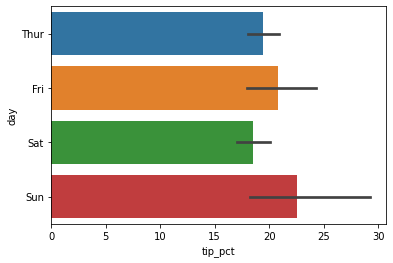

In [10]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

Curiosament dissabte és el dia més fluix per les propines!

#####
<span style=color:white><font size=3><b><u> </u></b> 1 Categòrica = ('Time'), 1 Numèrica = '% tips'</font></span>

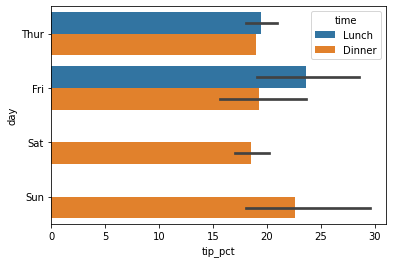

In [11]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")


In [12]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [13]:
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


In [14]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [15]:
round((tips['tip']).describe(), 3)
(tips['tip']).median().round(3)

2.9

<span style=color:white>Box Plots</span>

<span style=color:white><font size=3><b><u></u></b> 1 Numérica = ('Tip')</font></span>

C:\Users\Toni Andreu\AppData\Roaming\Python\Python39\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


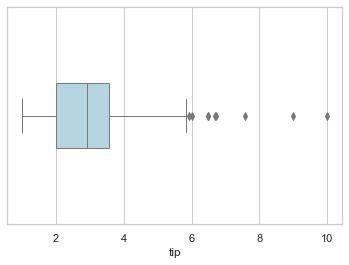

In [16]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

<span style=color:white><font size=3><b><u>With StripPlot</u></b> 1 Numérica = ('Tip')</font></span>

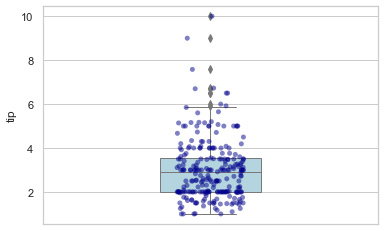

In [17]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

<span style=color:white><font size=4><b><u>Una Variable</u></b>: 1 Numèrica = 'tip_pct'</font></span>

<AxesSubplot:ylabel='tip_pct'>

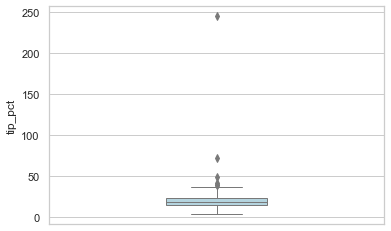

In [18]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

<span style=color:white><font size=4><b><u>Dues Variables</u></b>: 1 Categòrica = ('Time'), 1 Numèrica = 'Tip'</font></span>

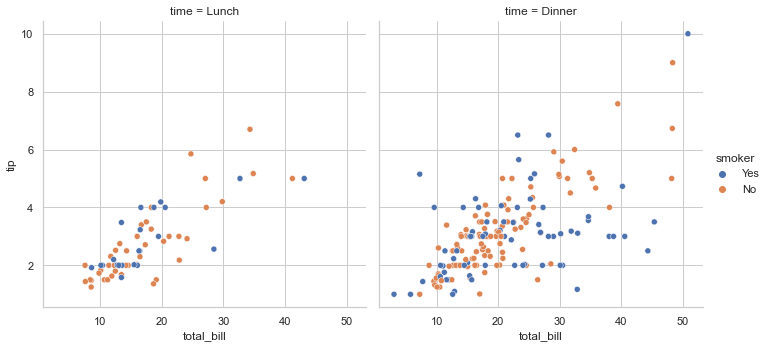

In [19]:
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df)

<span style=color:white><font size=4><b><u>Usant Relplot amb 4 Variables</u></b>: 2 Categòriques = ('Sexe', 'Fumador o no'), 2 Numèriques = ('Totl Bill', 'Tip')</font></span>

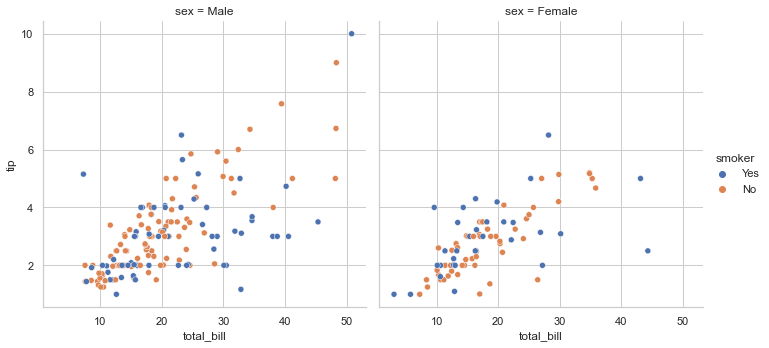

In [20]:
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", col = "sex", data = df)

<span style=color:white><font size=4><b><u>Usant Catplot amb Dues Variables</u></b>: 1 Categòrica = 'day', 1 Numèrica = 'tip_pct'</font></span>

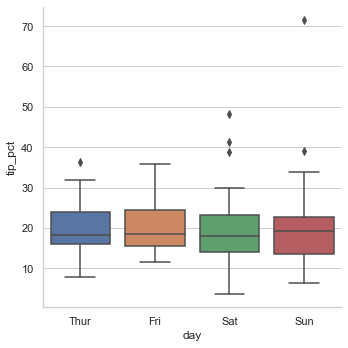

In [21]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245])

<span style=color:white><font size=4><b><u>Usant Catplot i StripPlot</u></b>: 1 Categòrica = 'day', 1 Numèrica = 'tip_pct'</font></span>

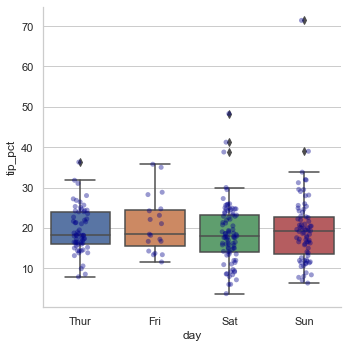

In [22]:
## afegim variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245])

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4)


<span style=color:white><font size=4><b><u>Dues Variables usant catplot</u></b>: 1 Categòrica = 'day', 1 Numèrica = 'total_bill'</font></span>

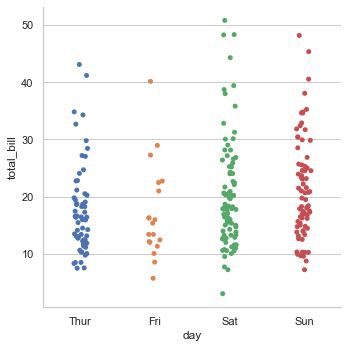

In [23]:
sns.catplot(x = "day", y = "total_bill", data = df)

<span style=color:white><font size=4><b><u>Tres Variables</u></b> : 2 Categòriques = ('day', 'time'), 1 Numèrica = 'tip_pct'</font></span>

<AxesSubplot:xlabel='day', ylabel='tip_pct'>

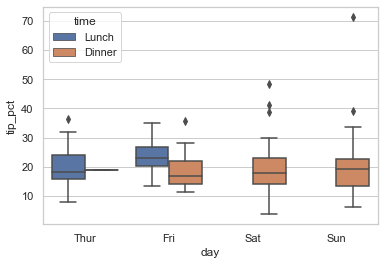

In [24]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245])

<span style=color:white><font size=4><b><u>Tres Variables</u></b> : 2 Categòriques = ('day', 'Sexe'), 1 Numèrica = 'total bill'</font></span>

<AxesSubplot:xlabel='day', ylabel='total_bill'>

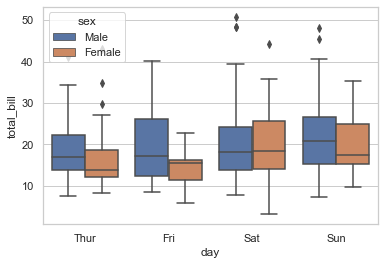

In [25]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df)

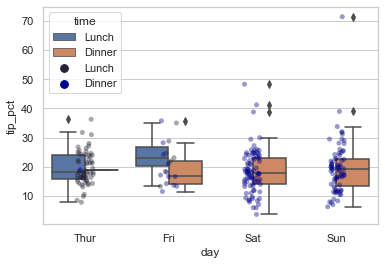

In [26]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245])
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4)

<span style=color:white><font size=4><b><u>Tres Variables</u></b> : 2 Categòriques = ('day', 'time'), 1 Numèrica = 'tip_pct'</font></span>

<span style=color:white><font size=4><b><u>Tres Variables amb Catplot</u></b> : 2 Categòriques = ('day', 'sex'), 1 Numèrica = 'total_bill'</font></span>

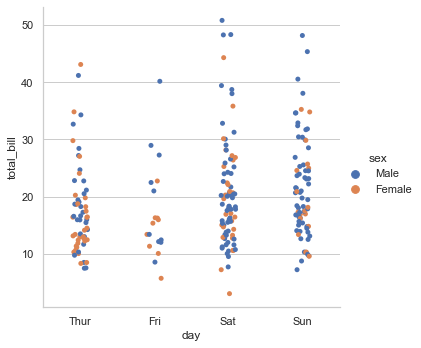

In [27]:
sns.catplot(x = "day", y = "total_bill", hue = "sex", data = df);

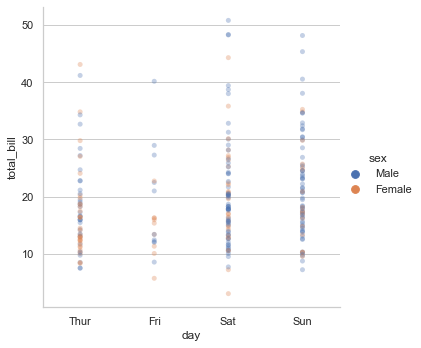

In [28]:
sns.catplot(x = "day", y = "total_bill", jitter = False, hue = "sex", alpha = .33, data = df)

## <span style=color:white>Facet Grids & Categorical DataFrame</span>

Afegim una variable categòrica addicional. 
Usem el mètode <span style=color:blue><b>factorplot( )</b></span> de <span style=color:blue>"Facet Grid"</span> :

<span style=color:white><font size=4><b><u>Quatre Variables</u></b> : 3 Categòriques = ('day', 'time', 'smoker'), 1 Numèrica = 'tip_pct'</font></span>

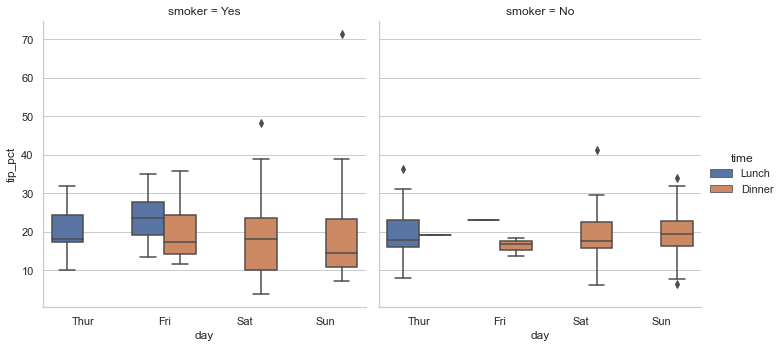

In [29]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245])

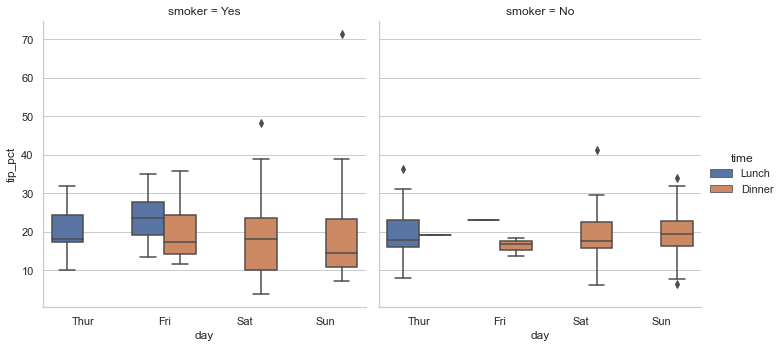

In [30]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245])

### Ex2
##### Repeteix l'exercici amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = "movies.dat"
movie_column_l = ['ID', 'TITOL', 'GENERES']
# df = pd.read_table(file, sep ='::', header=None, names=movie_column_l, engine='python')
df= pd.read_csv('movies.csv')
df.sample(7)

,1,Toy Story (1995),Animation|Children's|Comedy
1664,1714,Never Met Picasso (1996),Romance
1181,1200,Aliens (1986),Action|Sci-Fi|Thriller|War
2548,2618,"Castle, The (1997)",Comedy
1584,1628,"Locusts, The (1997)",Drama
2273,2343,"Naked Man, The (1998)",Drama
750,761,"Phantom, The (1996)",Adventure
1805,1875,Clockwatchers (1997),Comedy


In [56]:
df.shape

(3882, 3)

In [57]:
# adding column name to the respective columns
df.columns =['ID', 'Title', 'Genre']
df.columns

Index(['ID', 'Title', 'Genre'], dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3882 non-null   int64 
 1   Title   3882 non-null   object
 2   Genre   3882 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [59]:
df.dtypes
df.isnull().sum()

# Estupendo NO hi han nulls!!!

ID       0
Title    0
Genre    0
dtype: int64

In [60]:
df.head(10)

,ID,Title,Genre
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
5,7,Sabrina (1995),Comedy|Romance
6,8,Tom and Huck (1995),Adventure|Children's
7,9,Sudden Death (1995),Action
8,10,GoldenEye (1995),Action|Adventure|Thriller
9,11,"American President, The (1995)",Comedy|Drama|Romance


#### Let's extract from title the year that the movie was made

In [61]:
# create a new column for the movie year
df['Year']= df['Title'].str[-5:-1].astype(int)
df.head(10)

,ID,Title,Genre,Year
0,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
1,3,Grumpier Old Men (1995),Comedy|Romance,1995
2,4,Waiting to Exhale (1995),Comedy|Drama,1995
3,5,Father of the Bride Part II (1995),Comedy,1995
4,6,Heat (1995),Action|Crime|Thriller,1995
5,7,Sabrina (1995),Comedy|Romance,1995
6,8,Tom and Huck (1995),Adventure|Children's,1995
7,9,Sudden Death (1995),Action,1995
8,10,GoldenEye (1995),Action|Adventure|Thriller,1995
9,11,"American President, The (1995)",Comedy|Drama|Romance,1995


##### clean title

In [62]:
# Remove year from title
df['Title'] = df['Title'].str.replace(" \([^)]*\)", "", regex=True)
df.head(10)

,ID,Title,Genre,Year
0,2,Jumanji,Adventure|Children's|Fantasy,1995
1,3,Grumpier Old Men,Comedy|Romance,1995
2,4,Waiting to Exhale,Comedy|Drama,1995
3,5,Father of the Bride Part II,Comedy,1995
4,6,Heat,Action|Crime|Thriller,1995
5,7,Sabrina,Comedy|Romance,1995
6,8,Tom and Huck,Adventure|Children's,1995
7,9,Sudden Death,Action,1995
8,10,GoldenEye,Action|Adventure|Thriller,1995
9,11,"American President, The",Comedy|Drama|Romance,1995


In [63]:
oldest = df['Year'].min()
newest = df['Year'].max()
print ("Movies from {} to {}".format (oldest,newest))

Movies from 1919 to 2000


#### Let's see the 10 years with more production ( from 1919 to 2000)

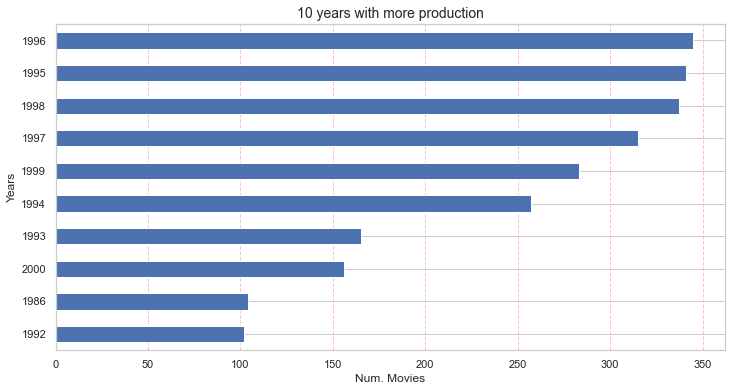

In [64]:
# 10 Anys amb més producció
plt.figure(figsize=(12,6))
x= df['Year'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('10 years with more production', size =14)
plt.xlabel ("Num. Movies", size =12)
plt.ylabel ("Years", size =12)
plt.grid(axis = 'x', ls = '--', color = "pink")
plt.show()


#### Now the 10 years with less production ( from 1919 to 2000)

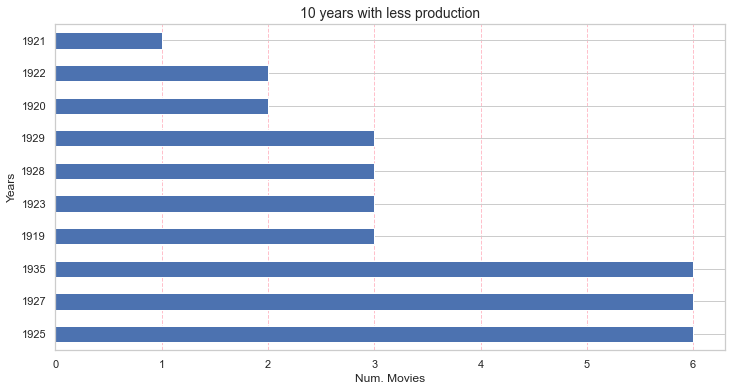

In [65]:
# 10 Anys amb menys producció
plt.figure(figsize=(12,6))
x= df['Year'].value_counts(ascending=True)[:10].sort_values(ascending=False).plot(kind='barh')
plt.title('10 years with less production', size =14)
plt.xlabel ("Num. Movies", size =12)
plt.ylabel ("Years", size =12)
plt.grid(axis = 'x', ls = '--', color = "pink")
plt.show()

### Let's work on Genres

In [66]:
# creem llista a Genre, separant els valor múltiples
df['Genre']= df['Genre'].str.split('|')
df.head()
names = df['Genre'].values.tolist()
print(names[:5])

[['Adventure', "Children's", 'Fantasy'], ['Comedy', 'Romance'], ['Comedy', 'Drama'], ['Comedy'], ['Action', 'Crime', 'Thriller']]


##### Get a list with all unique values

In [67]:
# obtain list of all unique values of Genres
generes_all= []

def get_elements_of_nested_list(element):
    for x in element:
        for each_element in x:
            if each_element not in generes_all:
                generes_all.append(each_element)

get_elements_of_nested_list(names)

generes_all.sort()
print (generes_all)

['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


##### Lets create a column for each Genre
###### before let's check if there in null values on it

In [68]:
df['Genre'].isnull().sum()

0

In [69]:
# create a column for each Genre & get boolean results
for x in range (len(generes_all)):
    param = generes_all[x]
    df[param] = df.Genre.apply(lambda x: param in x)

df.head()

,ID,Title,Genre,Year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,Jumanji,"[Adventure, Children's, Fantasy]",1995,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,3,Grumpier Old Men,"[Comedy, Romance]",1995,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,4,Waiting to Exhale,"[Comedy, Drama]",1995,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,5,Father of the Bride Part II,[Comedy],1995,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,6,Heat,"[Action, Crime, Thriller]",1995,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


##### Make a Dict with the totals of movies by Genre

In [70]:
#Creates a Dict with al Genre totals
genres_Dict={}
for x in range (len(generes_all)):
    param = generes_all[x]
    total = df[param].sum()
    #print ("Total de {}= {}".format(param, total))
    new = dict(Tipus = param, total = total)
    genres_Dict[param]= total
print (genres_Dict)


{'Action': 503, 'Adventure': 283, 'Animation': 104, "Children's": 250, 'Comedy': 1199, 'Crime': 211, 'Documentary': 127, 'Drama': 1603, 'Fantasy': 68, 'Film-Noir': 44, 'Horror': 343, 'Musical': 114, 'Mystery': 106, 'Romance': 471, 'Sci-Fi': 276, 'Thriller': 492, 'War': 143, 'Western': 68}


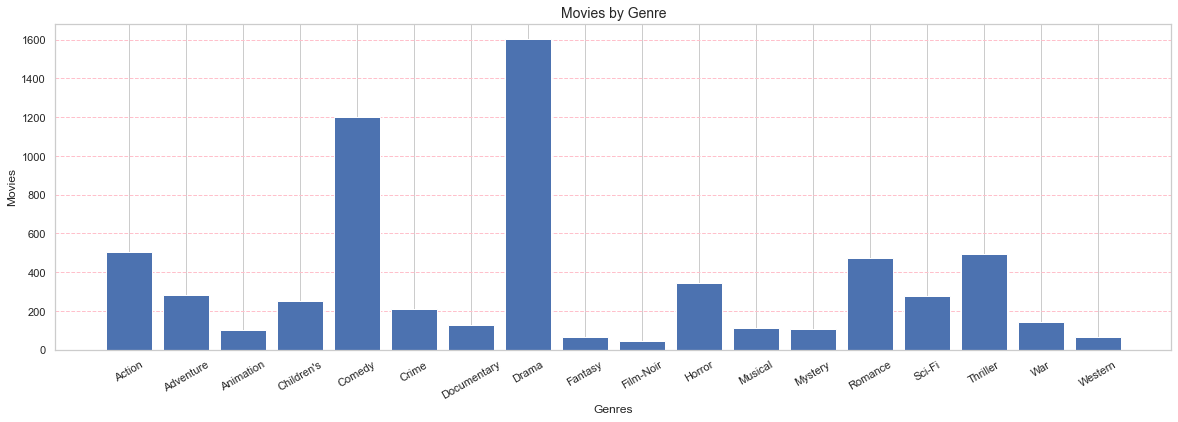

In [71]:
keys = genres_Dict.keys()
values = genres_Dict.values()
plt.figure(figsize=(20,6))
plt.bar(keys, values)
plt.title('Movies by Genre', size =14)
plt.xlabel ("Genres", size =12)
plt.xticks(rotation=30)
plt.ylabel ("Movies", size =12)
plt.grid(axis = 'y', ls = '--', color = "pink")
plt.show()

### Ex3  
##### En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.

##### Let see some genre in more details

##### Action movies by year

In [72]:
action = df[df['Action'] == True].copy()
action.head()

,ID,Title,Genre,Year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4,6,Heat,"[Action, Crime, Thriller]",1995,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7,9,Sudden Death,[Action],1995,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,10,GoldenEye,"[Action, Adventure, Thriller]",1995,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
13,15,Cutthroat Island,"[Action, Adventure, Romance]",1995,True,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
18,20,Money Train,[Action],1995,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


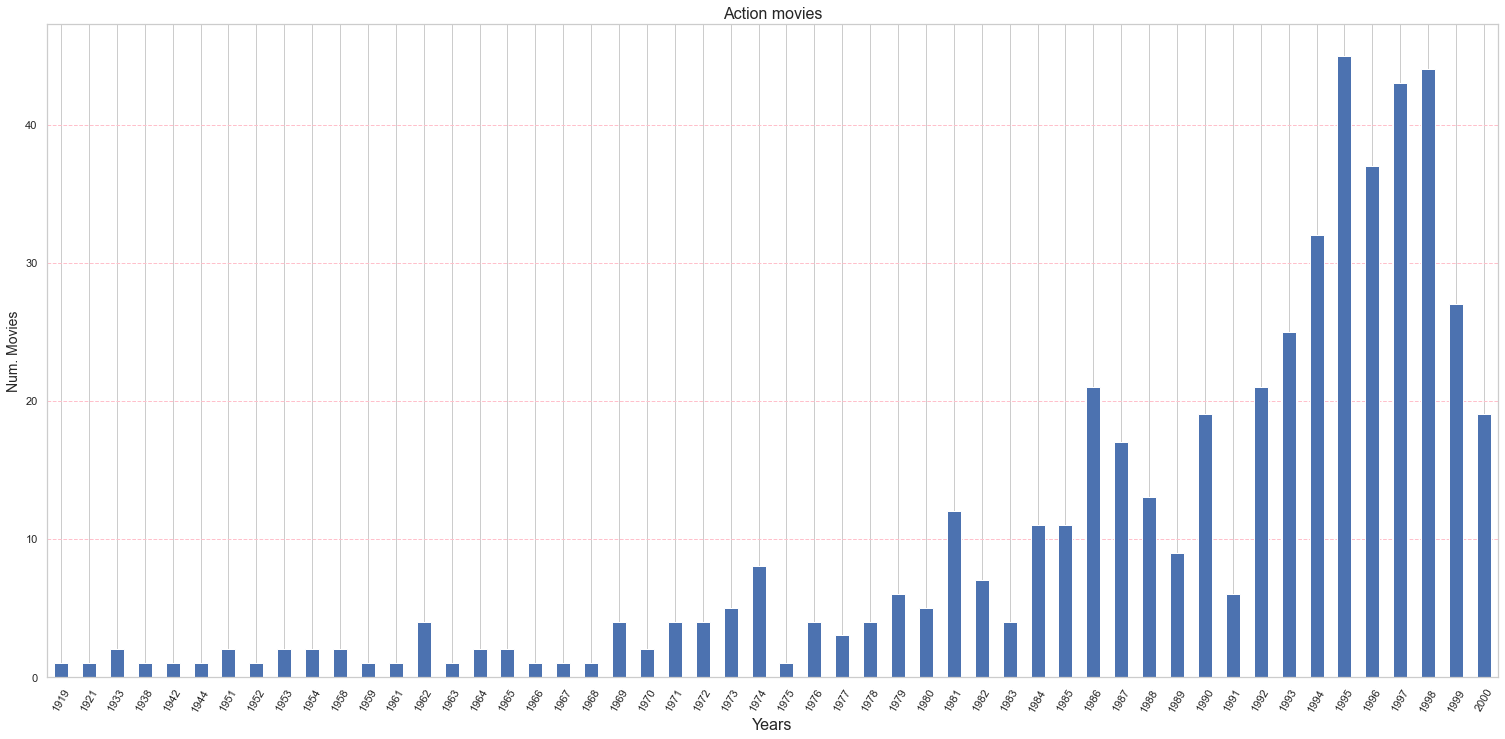

In [73]:
# Anys vs Action
plt.figure(figsize=(26,12))
x= action['Year'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title('Action movies', size =16)
plt.ylabel ("Num. Movies", size =14)
plt.xticks(rotation=60)
plt.xlabel ("Years", size =16)
plt.grid(axis = 'y', ls = '--', color = "pink")
plt.show()

##### Romance movies by year

In [74]:
romance = df[df['Romance'] == True].copy()
romance.head()

,ID,Title,Genre,Year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,3,Grumpier Old Men,"[Comedy, Romance]",1995,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
5,7,Sabrina,"[Comedy, Romance]",1995,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
9,11,"American President, The","[Comedy, Drama, Romance]",1995,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
13,15,Cutthroat Island,"[Action, Adventure, Romance]",1995,True,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
15,17,Sense and Sensibility,"[Drama, Romance]",1995,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


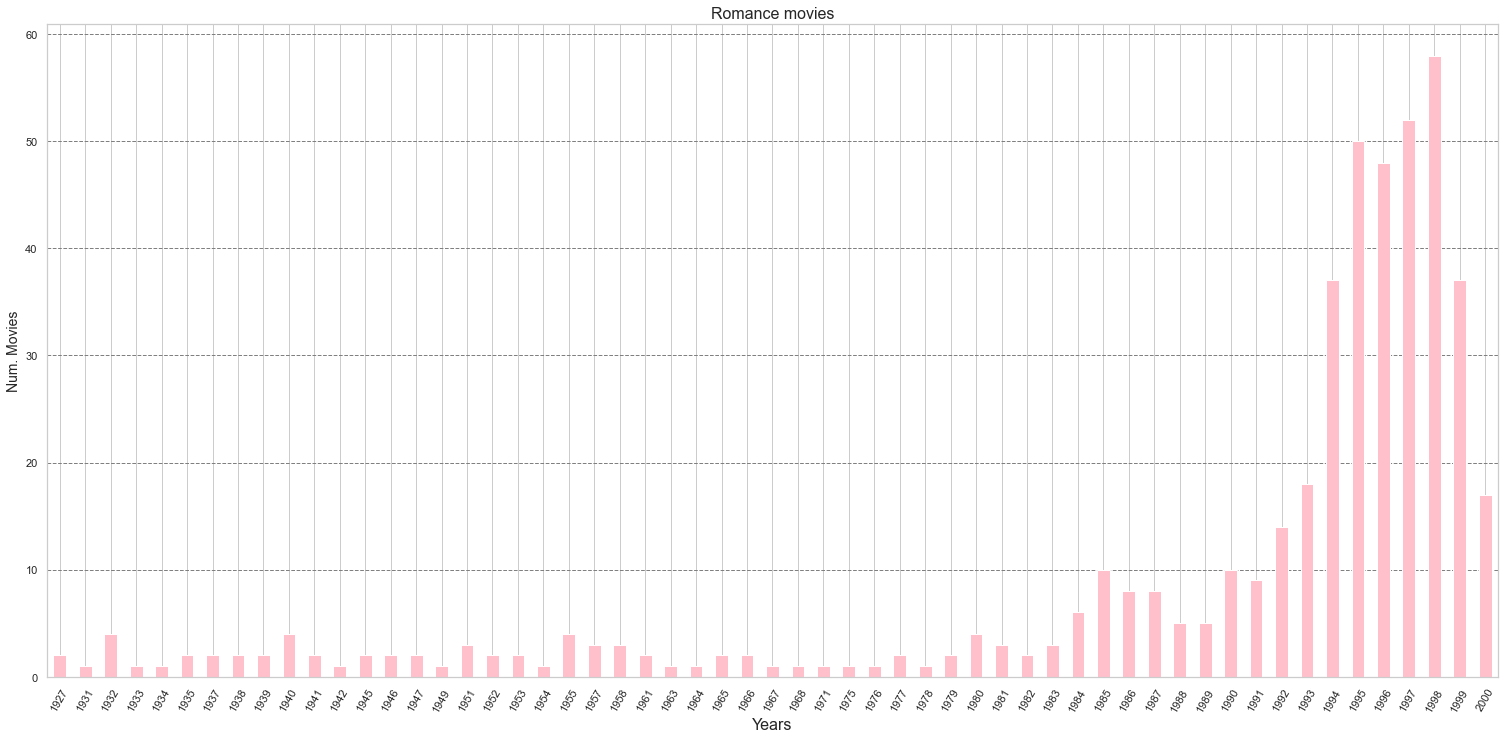

In [75]:
# Anys vs Romance
plt.figure(figsize=(26,12))
x= romance['Year'].value_counts().sort_index(ascending=True).plot(kind='bar', color ='pink')
plt.title('Romance movies', size =16)
plt.ylabel ("Num. Movies", size =14)
plt.xticks(rotation=60)
plt.xlabel ("Years", size =16)
plt.grid(axis = 'y', ls = '--', color = "grey")
plt.show()

##### És interesant observant el fort augment de pel.lícules d'ambdos gèneres a partir de 1993!

#### Let's see movies from 1992 in more detail

In [76]:
# ANYS 92...1999
late_1990s = df[(df['Year'] >= 1992) & (df['Year'] < 2000 )].copy()
late_1990s.head()

,ID,Title,Genre,Year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,Jumanji,"[Adventure, Children's, Fantasy]",1995,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,3,Grumpier Old Men,"[Comedy, Romance]",1995,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,4,Waiting to Exhale,"[Comedy, Drama]",1995,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,5,Father of the Bride Part II,[Comedy],1995,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,6,Heat,"[Action, Crime, Thriller]",1995,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [77]:
#Creates a Dict with al Genre totals for those years
genres92s_Dict={}
for x in range (len(generes_all)):
    param = generes_all[x]
    total = late_1990s[param].sum()
    #print ("Total de {}= {}".format(param, total))
    new = dict(Tipus = param, total = total)
    genres92s_Dict[param]= total
print (genres92s_Dict)

{'Action': 274, 'Adventure': 120, 'Animation': 47, "Children's": 131, 'Comedy': 696, 'Crime': 131, 'Documentary': 102, 'Drama': 983, 'Fantasy': 28, 'Film-Noir': 9, 'Horror': 101, 'Musical': 28, 'Mystery': 56, 'Romance': 314, 'Sci-Fi': 109, 'Thriller': 301, 'War': 54, 'Western': 16}


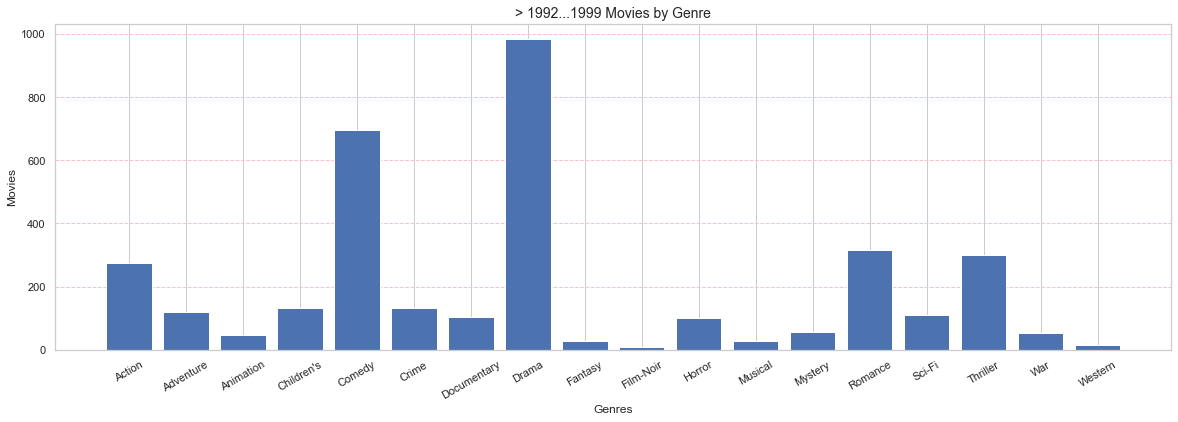

In [78]:
genres92s = genres92s_Dict.keys()
movies92s = genres92s_Dict.values()
plt.figure(figsize=(20,6))
plt.bar(genres92s, movies92s)
plt.title('> 1992...1999 Movies by Genre', size =14)
plt.xlabel ("Genres", size =12)
plt.xticks(rotation=30)
plt.ylabel ("Movies", size =12)
plt.grid(axis = 'y', ls = '--', color = "pink")
plt.show()

##### Observem en les produccions des del 1992 hi ha un fort descens de pel.lícules dels gèneres: Western, Musical, Film-noir & Animation. Per contra, la producció de Comedy, Drama, Action augmenta molt. La comercialitzat guanya a f partir de finals dels 90!